# MIEX-Python
is a Mie scattering code for large grains written in Python and based on [MIEX](https://ui.adsabs.harvard.edu/abs/2018ascl.soft10019W) by [Wolf & Voshchinnikov (2004)](https://ui.adsabs.harvard.edu/abs/2004CoPhC.162..113W).

In [1]:
import miex
import numpy as np
import matplotlib.pyplot as plt

## Example 1
Calculate efficiency factors for multiple grain sizes

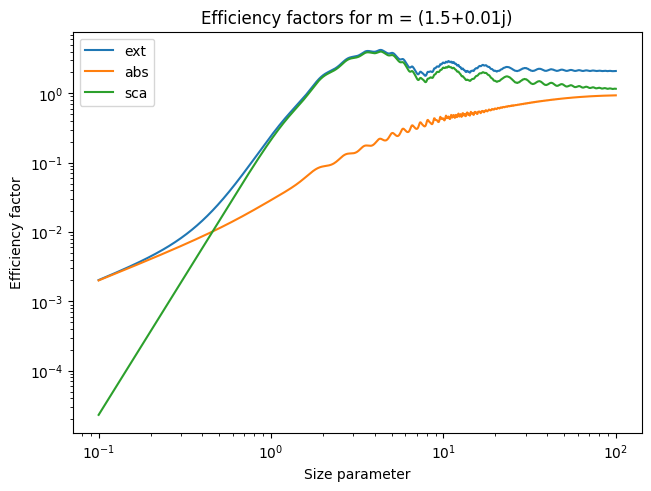

In [2]:
# complex refractive index
m = complex(1.5, 0.01)
# number of size parameters
nsize = 1000

# array of size parameter
x_arr = np.geomspace(1e-1, 1e2, nsize)

# run miex and calculate efficiency factors
Q_ext = np.zeros_like(x_arr, dtype=float)
Q_abs = np.zeros_like(x_arr, dtype=float)
Q_sca = np.zeros_like(x_arr, dtype=float)
for i, x in enumerate(x_arr):
    result = miex.get_mie_coefficients(x, m)
    Q_ext[i] = result["Q_ext"]
    Q_abs[i] = result["Q_abs"]
    Q_sca[i] = result["Q_sca"]

# plot the results
fig, ax = plt.subplots(1, 1, layout="constrained")
ax.plot(x_arr, Q_ext, label="ext")
ax.plot(x_arr, Q_abs, label="abs")
ax.plot(x_arr, Q_sca, label="sca")

ax.set_xlabel("Size parameter")
ax.set_xscale("log")

ax.set_ylabel("Efficiency factor")
ax.set_yscale("log")

ax.legend()
ax.set_title(f"Efficiency factors for m = {m}")
plt.show()

## Example 2
Calculate scattering matrix elements for single grain size

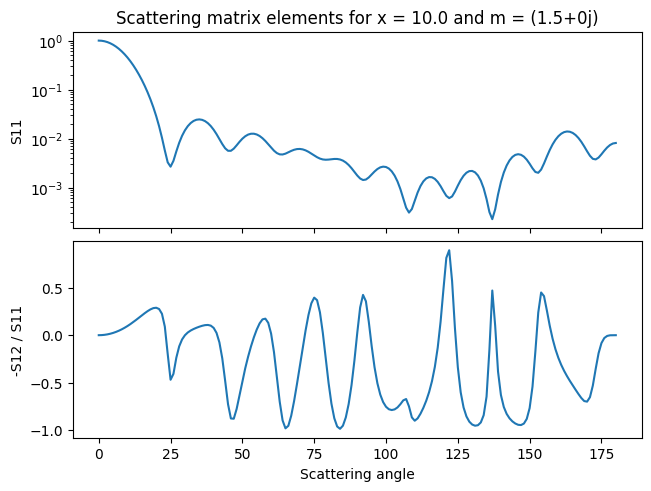

In [3]:
# half number of scattering angles (0...pi/2)
nang = 91
nang2 = 2 * nang - 1
# complex refractive index
m = complex(1.5, 0.0)
# size parameter
x = 10.0

# run miex and calculate scattering matrix elements
result = miex.get_mie_coefficients(x, m, nang, doSA=True)
matrix = miex.get_scattering_matrix(result["SA_1"], result["SA_2"])

# plot the results
fig, ax = plt.subplots(2, 1, sharex=True, layout="constrained")
theta = np.rad2deg(result["theta"])

ax[0].plot(theta, matrix["S_11"] / matrix["S_11"][0])
ax[0].set_ylabel("S11")
ax[0].set_yscale("log")

ax[1].plot(theta, -matrix["S_12"] / matrix["S_11"])
ax[1].set_xlabel("Scattering angle")
ax[1].set_ylabel("-S12 / S11")

ax[0].set_title(f"Scattering matrix elements for x = {x} and m = {m}")
plt.show()

## Example 2
Calculate scattering matrix elements and average over grain size distribution

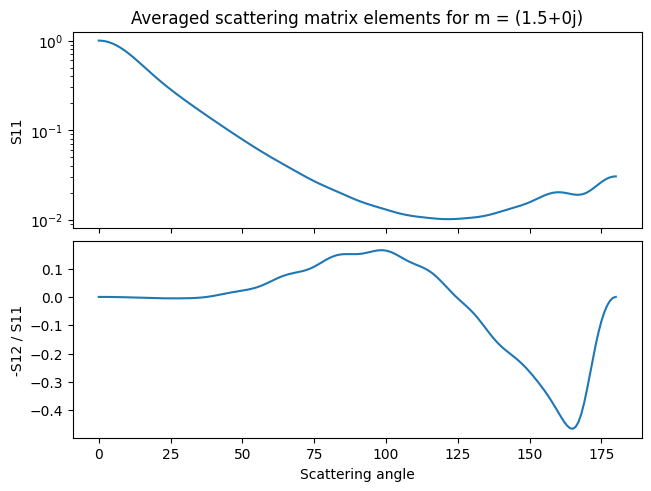

In [4]:
# half number of scattering angles (0...pi/2)
nang = 91
nang2 = 2 * nang - 1
# number of size parameters
nsize = 100
# complex refractive index
m = complex(1.5, 0.0)

# array of size parameter and size distribution
x_arr = np.geomspace(1e-1, 1e1, nsize)
nx_arr = x_arr ** (-3.5)

# run miex and calculate scattering matrix elements
S_11_tmp = np.zeros((nsize, nang2), dtype=float)
S_12_tmp = np.zeros((nsize, nang2), dtype=float)
for i, x in enumerate(x_arr):
    result = miex.get_mie_coefficients(x, m, nang, doSA=True)
    matrix = miex.get_scattering_matrix(result["SA_1"], result["SA_2"])
    S_11_tmp[i] = matrix["S_11"]
    S_12_tmp[i] = matrix["S_12"]

S_11 = np.zeros(nang2, dtype=float)
S_12 = np.zeros(nang2, dtype=float)
weight = np.trapz(nx_arr, x=x_arr)
for i in range(nang2):
    S_11[i] = np.trapz(S_11_tmp[:, i] * nx_arr, x=x_arr) / weight
    S_12[i] = np.trapz(S_12_tmp[:, i] * nx_arr, x=x_arr) / weight

# plot the results
fig, ax = plt.subplots(2, 1, sharex=True, layout="constrained")
theta = np.rad2deg(result["theta"])

ax[0].plot(theta, S_11 / S_11[0])
ax[0].set_ylabel("S11")
ax[0].set_yscale("log")

ax[1].plot(theta, -S_12 / S_11)
ax[1].set_xlabel("Scattering angle")
ax[1].set_ylabel("-S12 / S11")

ax[0].set_title(f"Averaged scattering matrix elements for m = {m}")
plt.show()